Add your information below and submit the file via canvas (till the end of the day) to claim points for participation.

Names:

Group number:

Collaborators:

# Part 1: Describing Data

### What do you find in this part?

In this bootcamp, first, you will familiarize yourself with the Python libraries 'statsmodels' and 'SciPy' that let you do statistical analysis: calculate descriptive statistics, sample datapoints, study relationships between variables and perform hypothesis testing. Then, second, you will work (in groups) on a set of exercises that will let you practice your skills.

Here we show a couple of examples of how to do common analyses, but there are many more useful probability distributions and statistical tests. In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook:
- [statsmodels](https://www.statsmodels.org/stable/examples/index.html), [more complete documentation](https://www.statsmodels.org/stable/stats.html)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)

## B1.1 Tutorial: How to use the libraries

- You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Here we load it. Take some time to familiarize yourself with the contents. One row represents one county.

In [8]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [9]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [10]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [11]:
df.sample(10)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2350,45069,South Carolina,Marlboro,27993,14930,13063,3.1,39.8,50.7,3.7,...,1.5,0.7,1.5,24.7,9600,78.4,16.4,5.2,0.0,15.5
2370,46019,South Dakota,Butte,10292,5086,5206,3.5,91.8,0.1,1.4,...,2.6,0.5,8.8,22.8,5015,70.0,15.4,13.7,0.9,3.0
1466,28131,Mississippi,Stone,17978,9140,8838,1.7,77.0,19.2,1.7,...,3.3,1.5,1.9,30.4,6920,72.5,21.3,6.2,0.0,9.7
542,13315,Georgia,Wilcox,8972,5252,3720,2.1,58.7,37.6,0.0,...,2.6,1.9,3.4,27.0,2446,57.1,32.1,10.7,0.2,6.7
1931,37083,North Carolina,Halifax,53407,25620,27787,2.6,39.2,51.9,3.2,...,1.8,1.2,1.7,23.9,19726,76.7,17.6,5.6,0.1,14.1
2342,45053,South Carolina,Jasper,26549,13344,13205,14.0,40.3,43.8,0.0,...,2.5,1.1,3.6,28.4,11707,77.6,14.7,7.7,0.1,11.9
628,17067,Illinois,Hancock,18738,9249,9489,1.3,96.8,0.6,0.1,...,2.2,0.9,7.5,23.7,8595,75.8,13.8,10.2,0.2,6.8
1947,37115,North Carolina,Madison,21027,10461,10566,2.4,94.1,1.9,0.2,...,2.2,0.6,7.1,27.5,8935,75.4,14.8,9.8,0.1,7.3
1206,24029,Maryland,Kent,19923,9382,10541,4.3,78.4,15.1,0.2,...,7.0,2.1,8.6,25.6,8984,76.1,13.3,10.1,0.5,7.2
331,12023,Florida,Columbia,67806,35080,32726,5.4,73.4,17.7,0.3,...,0.9,1.6,3.1,24.2,25226,71.5,24.0,4.4,0.1,14.8


- We will focus first on income per capita across counties.

<Axes: >

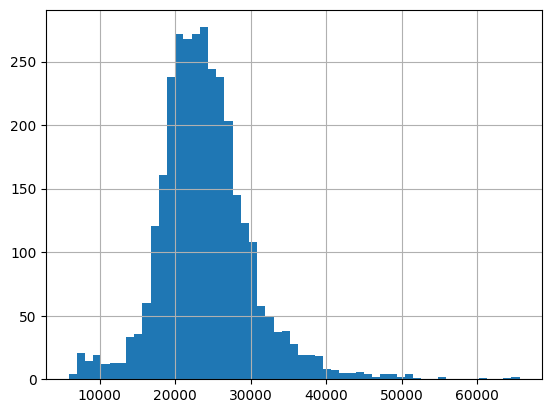

In [12]:
df['IncomePerCap'].hist(bins=55)

### 1. Calculating descriptive statisctics

- Let's calculate basic descriptive statistics of the income per capita.

In [13]:
df['IncomePerCap'].describe()

count     3220.000000
mean     23981.771739
std       6204.339960
min       5878.000000
25%      20238.500000
50%      23460.000000
75%      27053.250000
max      65600.000000
Name: IncomePerCap, dtype: float64

- What distribution does the data come from? Here is how we can test the goodness of the fit.

In [14]:
# does the data come from a normal distrbution?
# if needed check the documentation of diagnostic 
# https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.kstest_normal.html
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')

(0.0637621121184162, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

In [15]:
#how about exponential?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'exp')

(0.433243770582646, 0.0009999999999998899)

- p < 0.05 -> not exponential either!

### 2. How to sample the data

- Often we need to find random samples from the dataset. We can do so conveniently with pandas wrappers.

In [16]:
#make 10 samples with replacement
sample1_counties = df.sample(n = 10, replace = True)

#make 10 samples without replacement
sample1_counties = df.sample(n = 10, replace = False)

#sometimes we want to sample in an ublanaced way, so that we upsample datapoints of certain characteristic,
#and downsample the others. this can be acieved with weights parameter
#here we sample by upsampling counties with large population
sample2_counties = df.sample(n = 10, replace = False, weights = df['TotalPop'])

In [17]:
#on avergage, the samples in the sample produce with reveighting now have higher population, as we wanted!
print(sample1_counties['TotalPop'].mean())
print(sample2_counties['TotalPop'].mean())

123371.5
1712074.7


### 3. Examining relationship between two variables

- Is income per capita of a county correlated with the unemployment?

In [18]:
stats.pearsonr(df['IncomePerCap'],df['Employed'])

PearsonRResult(statistic=0.2646136320394489, pvalue=9.942215354239015e-53)

- There is a small (0.26), but significant (p < 0.05) positive correlation.

In [19]:
stats.spearmanr(df['IncomePerCap'],df['Employed'])

SignificanceResult(statistic=0.30770631560595474, pvalue=1.415296431173735e-71)

- Spearman rank coorrelation is also significant.

Check the differences between the two correlations [here](https://www.theiotacademy.co/blog/pearson-vs-spearman-correlation/)

### 4. Hypothesis testing

- Is income per capita higher in New York counties compared to California counties?

In [20]:
df.loc[df['State'] == 'New York']['IncomePerCap'].mean()

28189.75806451613

In [21]:
df.loc[df['State'] == 'California']['IncomePerCap'].mean()

27902.603448275862

- We see that there is a ~300$ gap. Quite a lot!
- But is it significantly higher? Let's use a t-test. This is a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values. 

In [22]:
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'California']['IncomePerCap'])

TtestResult(statistic=0.19788117232375713, pvalue=0.8434785239169611, df=118.0)

- p is not smaller than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

### 5. How to measure uncertainty
- Now we see the importance of mesuring uncertainty and indicating it on data visualizations.
- Visual inspection of 95% confidence intervals lets us see that the difference is not significant (the errorbars are overlapping).

(25000.0, 32000.0)

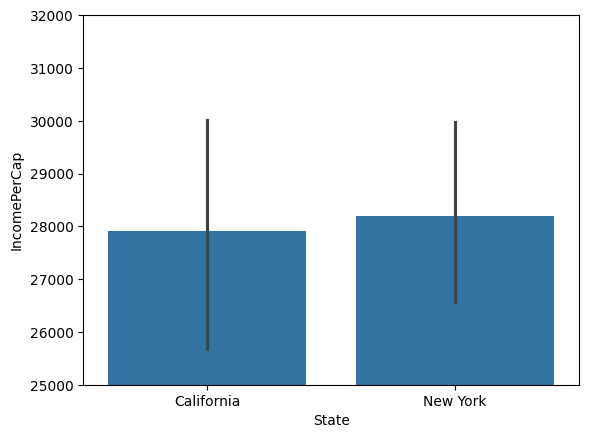

In [23]:
ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','California'])])
plt.ylim([25000,32000])

## B1.2: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since in 2025 it is still unethical (and perhaps impossible?) in this setting to run a controlled experiment involving citizens (e.g. fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

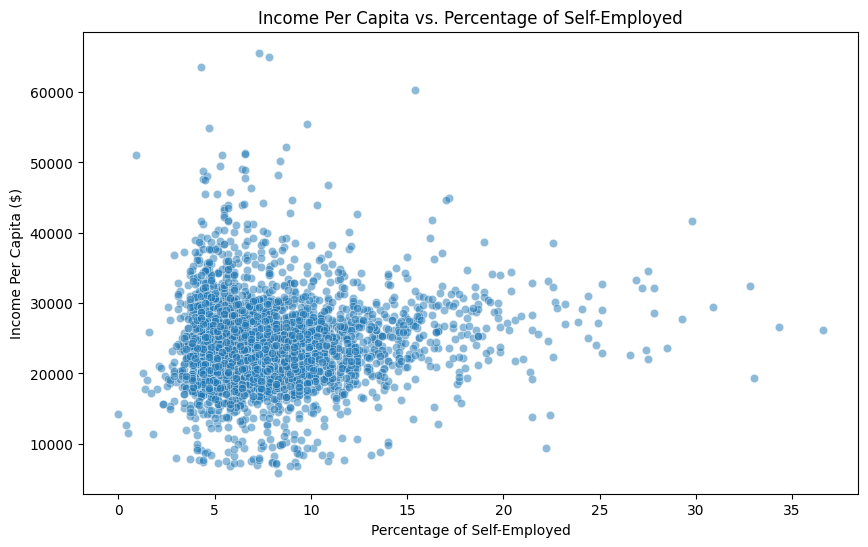

In [ ]:
### your code and or answer here ###
### start with a scatterplot and make sure it's properly labeled

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='SelfEmployed',
    y='IncomePerCap',
    data=df,
    alpha=0.5
)
plt.title('Income Per Capita vs. Percentage of Self-Employed')
plt.xlabel('Percentage of Self-Employed')
plt.ylabel('Income Per Capita ($)')
plt.show()


In [50]:
# Correlation Analysis
pearson_corr, pearson_p = stats.pearsonr(df['SelfEmployed'], df['IncomePerCap'])
spearman_corr, spearman_p = stats.spearmanr(df['SelfEmployed'], df['IncomePerCap'])

print(f"Pearson Correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4e})")
print(f"Spearman Correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4e})")


Pearson Correlation: 0.0873 (p-value: 7.0529e-07)
Spearman Correlation: 0.0564 (p-value: 1.3624e-03)


pearson: very weak relationship, correlation statistically significant
spearman: very weak relationship, correlation statistically significant

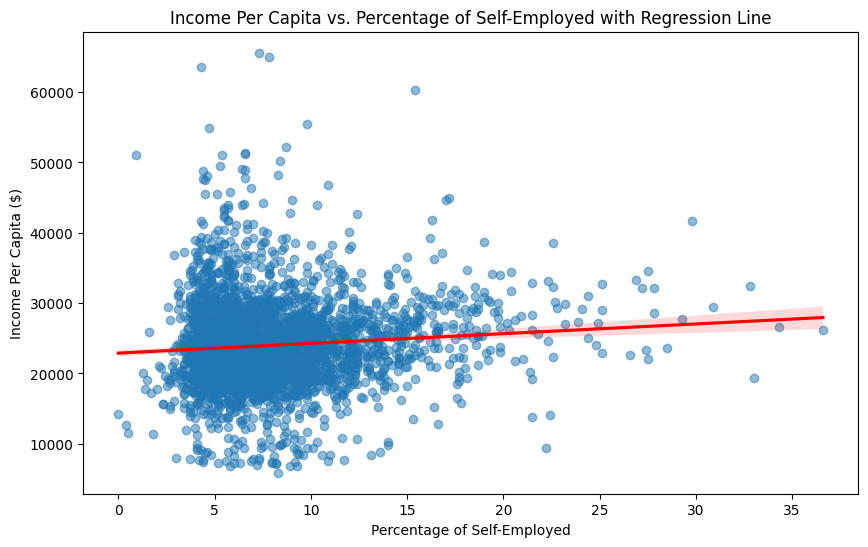

In [76]:
# Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='SelfEmployed',
    y='IncomePerCap',
    data=df,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('Income Per Capita vs. Percentage of Self-Employed with Regression Line')
plt.xlabel('Percentage of Self-Employed')
plt.ylabel('Income Per Capita ($)')
plt.show()


**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

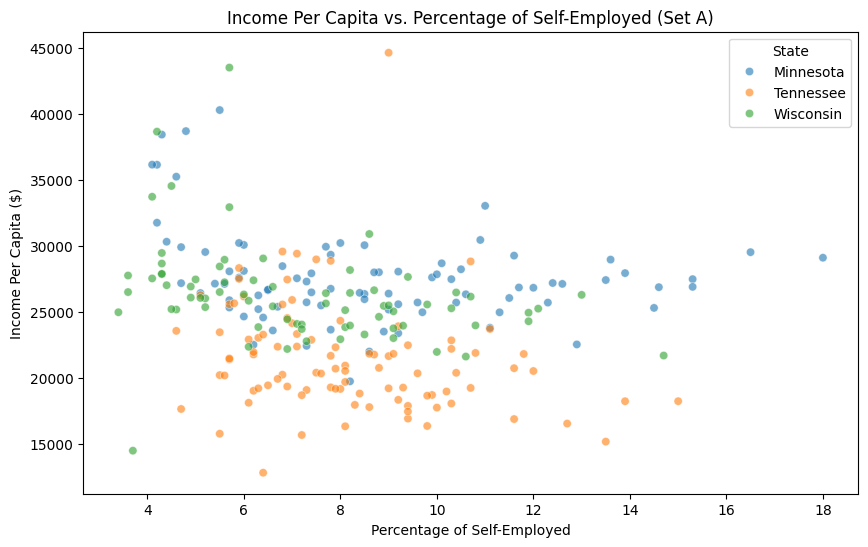

Set A - Pearson Correlation: -0.2023 (p-value: 1.1882e-03)
Set A - Spearman Correlation: -0.2367 (p-value: 1.4010e-04)


In [77]:
### your code and or answer here ###
### query might be helpful (see here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)


# Set A States
set_a_states = ['Wisconsin', 'Tennessee', 'Minnesota']

#  Filter Data for Set A
set_a_df = df[df['State'].isin(set_a_states)]

# Scatter Plot for Set A
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='SelfEmployed',
    y='IncomePerCap',
    hue='State',
    data=set_a_df,
    alpha=0.6
)
plt.title('Income Per Capita vs. Percentage of Self-Employed (Set A)')
plt.xlabel('Percentage of Self-Employed')
plt.ylabel('Income Per Capita ($)')
plt.legend(title='State')
plt.show()

# Correlation Analysis for Set A
pearson_corr_a, pearson_p_a = stats.pearsonr(set_a_df['SelfEmployed'], set_a_df['IncomePerCap'])
spearman_corr_a, spearman_p_a = stats.spearmanr(set_a_df['SelfEmployed'], set_a_df['IncomePerCap'])

print(f"Set A - Pearson Correlation: {pearson_corr_a:.4f} (p-value: {pearson_p_a:.4e})")
print(f"Set A - Spearman Correlation: {spearman_corr_a:.4f} (p-value: {spearman_p_a:.4e})")


**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

In [78]:
### your code and or answer here ###
### use hue as "extra" variable in the scatterplot.

grouped_a = set_a_df.groupby('State')

# Correlations for Each State
correlations_a = {}

for state, group in grouped_a:
    pearson_corr, pearson_p = stats.pearsonr(group['SelfEmployed'], group['IncomePerCap'])
    spearman_corr, spearman_p = stats.spearmanr(group['SelfEmployed'], group['IncomePerCap'])
    correlations_a[state] = {
        'Pearson Correlation': pearson_corr,
        'Pearson p-value': pearson_p,
        'Spearman Correlation': spearman_corr,
        'Spearman p-value': spearman_p
    }

for state, corr in correlations_a.items():
    print(f"\nState: {state}")
    print(f"  Pearson Correlation: {corr['Pearson Correlation']:.4f} (p-value: {corr['Pearson p-value']:.4e})")
    print(f"  Spearman Correlation: {corr['Spearman Correlation']:.4f} (p-value: {corr['Spearman p-value']:.4e})")



State: Minnesota
  Pearson Correlation: -0.2539 (p-value: 1.7665e-02)
  Spearman Correlation: -0.2111 (p-value: 4.9708e-02)

State: Tennessee
  Pearson Correlation: -0.2384 (p-value: 2.0012e-02)
  Spearman Correlation: -0.3170 (p-value: 1.7488e-03)

State: Wisconsin
  Pearson Correlation: -0.3291 (p-value: 4.7681e-03)
  Spearman Correlation: -0.4635 (p-value: 4.1249e-05)


**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning. Hint: It is useful to add a notion of confidence to your results and explore the data visually.

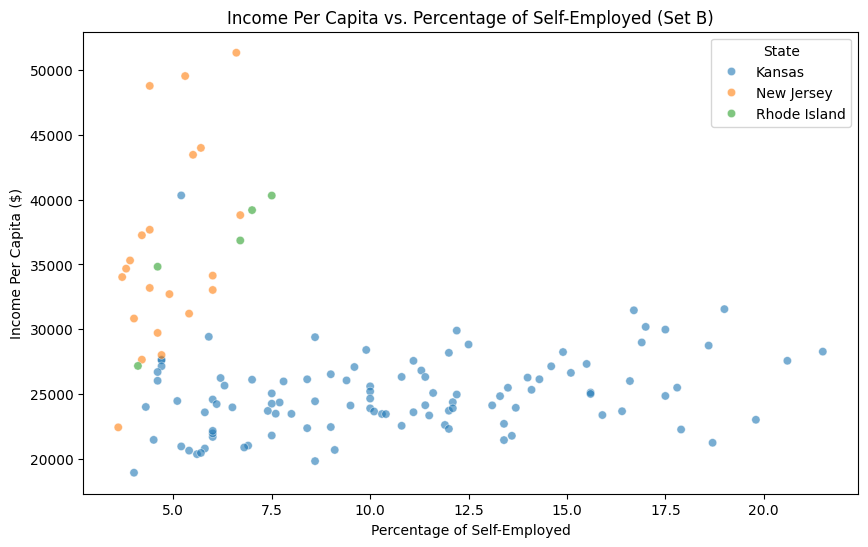

Set B - Pearson Correlation: -0.2322 (p-value: 7.6075e-03)
Set B - Spearman Correlation: -0.1601 (p-value: 6.7739e-02)

State: Kansas
  Pearson Correlation: 0.2581 (p-value: 7.8534e-03)
  Spearman Correlation: 0.2839 (p-value: 3.3333e-03)

State: New Jersey
  Pearson Correlation: 0.4804 (p-value: 2.7489e-02)
  Spearman Correlation: 0.4040 (p-value: 6.9295e-02)

State: Rhode Island
  Pearson Correlation: 0.9022 (p-value: 3.6183e-02)
  Spearman Correlation: 1.0000 (p-value: 1.4043e-24)


In [79]:
### your code and or answer here ###

# Set B States
set_b_states = ['New Jersey', 'Kansas', 'Rhode Island']

# Filter Data for Set B
set_b_df = df[df['State'].isin(set_b_states)]

# Scatter Plot for Set B
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='SelfEmployed',
    y='IncomePerCap',
    hue='State',
    data=set_b_df,
    alpha=0.6
)
plt.title('Income Per Capita vs. Percentage of Self-Employed (Set B)')
plt.xlabel('Percentage of Self-Employed')
plt.ylabel('Income Per Capita ($)')
plt.legend(title='State')
plt.show()

# Correlation Analysis for Set B
pearson_corr_b, pearson_p_b = stats.pearsonr(set_b_df['SelfEmployed'], set_b_df['IncomePerCap'])
spearman_corr_b, spearman_p_b = stats.spearmanr(set_b_df['SelfEmployed'], set_b_df['IncomePerCap'])

print(f"Set B - Pearson Correlation: {pearson_corr_b:.4f} (p-value: {pearson_p_b:.4e})")
print(f"Set B - Spearman Correlation: {spearman_corr_b:.4f} (p-value: {spearman_p_b:.4e})")

# Strongest Effect Within Set B

# Group Data by State
grouped_b = set_b_df.groupby('State')

# Calculate Correlations for Each State
correlations_b = {}

for state, group in grouped_b:
    pearson_corr, pearson_p = stats.pearsonr(group['SelfEmployed'], group['IncomePerCap'])
    spearman_corr, spearman_p = stats.spearmanr(group['SelfEmployed'], group['IncomePerCap'])
    correlations_b[state] = {
        'Pearson Correlation': pearson_corr,
        'Pearson p-value': pearson_p,
        'Spearman Correlation': spearman_corr,
        'Spearman p-value': spearman_p
    }

# Display the Correlations for Set B
for state, corr in correlations_b.items():
    print(f"\nState: {state}")
    print(f"  Pearson Correlation: {corr['Pearson Correlation']:.4f} (p-value: {corr['Pearson p-value']:.4e})")
    print(f"  Spearman Correlation: {corr['Spearman Correlation']:.4f} (p-value: {corr['Spearman p-value']:.4e})")



In [80]:
# Compare Sets A and B

avg_pearson_a = np.mean([corr['Pearson Correlation'] for corr in correlations_a.values()])
avg_spearman_a = np.mean([corr['Spearman Correlation'] for corr in correlations_a.values()])

avg_pearson_b = np.mean([corr['Pearson Correlation'] for corr in correlations_b.values()])
avg_spearman_b = np.mean([corr['Spearman Correlation'] for corr in correlations_b.values()])

print(f"\nAverage Set A - Pearson Correlation: {avg_pearson_a:.4f}")
print(f"Average Set A - Spearman Correlation: {avg_spearman_a:.4f}")

print(f"Average Set B - Pearson Correlation: {avg_pearson_b:.4f}")
print(f"Average Set B - Spearman Correlation: {avg_spearman_b:.4f}")


Average Set A - Pearson Correlation: -0.2738
Average Set A - Spearman Correlation: -0.3305
Average Set B - Pearson Correlation: 0.5469
Average Set B - Spearman Correlation: 0.5627


# Part 2: Becoming a DataVizard exercise 

This part is about data visualization! You will use common python libraries, Matplotlib and Seaborn to create effective and clear visualizations. You will work with a dataset containing information about the top ten grossing movies in each year. 

These are the visualizations we will make, and that you will use to solve the exercise:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Log-log](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html)

In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook. We will make simple visualizations, but you will notice that all of the visualizations consider many optional parameters. You are encouraged to explore them, and modify them to make the most efficient visualizations and match your desired style. As we discussed in class, the default visualizations are not necessarily the most efficient, so make sure to play around and find the optimal ones.

Beyond Matplotlib and Seaborn, there are many more resources that might be useful for you, for example:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) and [Folium](https://python-visualization.github.io/folium/)

Create your custom signature colorpalettes:
- [coolors](https://coolors.co/)

In [81]:
# Let's load necessary libraries and the datasets
# "pip install seaborn" if necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './Data/'


movies = pd.read_csv(data_folder+'blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

## B2.1 Tutorial: Using data visualization libraries

We will use the blockbusters dataset. Summary of the features:
- *Main_Genre*: the primary genre of the movie
- *Genre_2*
- *Genre_3*
- *imdb_rating*
- *length*: movie length in minutes
- *rank_in_year*: rank among the top 10 movies released that year
- *rating*: audience rating
- *studio*: the studio that produced the movie
- *title*: movie title
- *worldwide_gross*: total worldwide revenue in dollars
- *year*: year of release


## Visualizing a single variable

- First we will see how to visualize a single variable using matplotlib library. Let's focus on "Worldwide gross revenue" column of the dataframe and inspect the distribution, using histogram and boxplot.
- Notice the use of  plt.xlabel(), plt.ylabel(), plt.title() - every visualization should have axis labeled, and a title!
- plt.hist() takes a couple of important arguments: bins - the number of bins, and range - the range of values considered in the histogram.

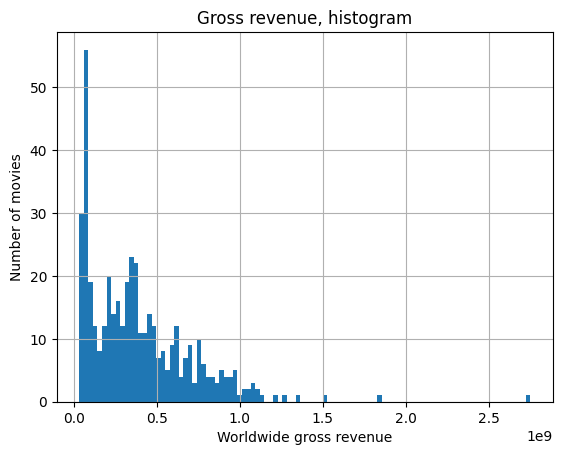

In [55]:
#we use pandas wrapper
movies['worldwide_gross'].hist(bins = 100)

#alternatively, we can use matplotlib directly
#plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('Number of movies')
plt.title('Gross revenue, histogram');

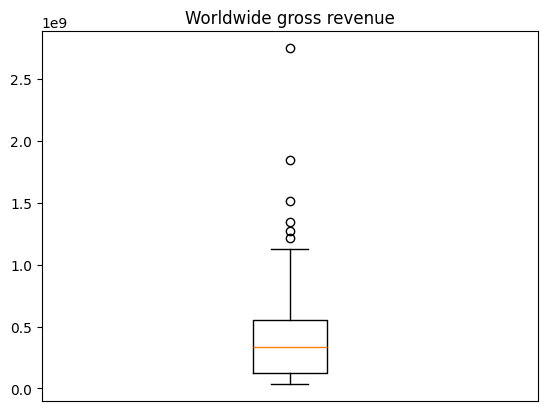

In [82]:
plt.boxplot(movies['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');

## Visualizing two continuous variables

- Let's see if blockbusters with higher ratings also make more revenue!
- There are many ways how a relationship between two variables can be examined. The simplest one is a scatterplot, using plt.scatterplot().

Text(0, 0.5, 'IMDB rating')

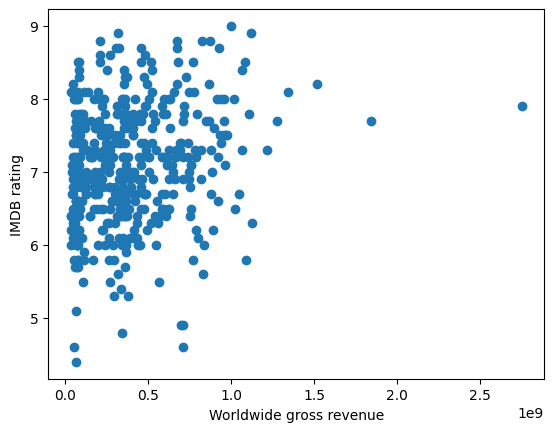

In [57]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'])

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

- Visually examining the plot, how do you interpret the relationship between revenue and IMDB rating?
- Markers indicatig the datapoints seem too large, and we cannot get a sense of the distribution in the area of the plot where the markers are overlapping.
- We'll try to make the markers smaller by specifying a small "s" size parameter.

Text(0, 0.5, 'IMDB rating')

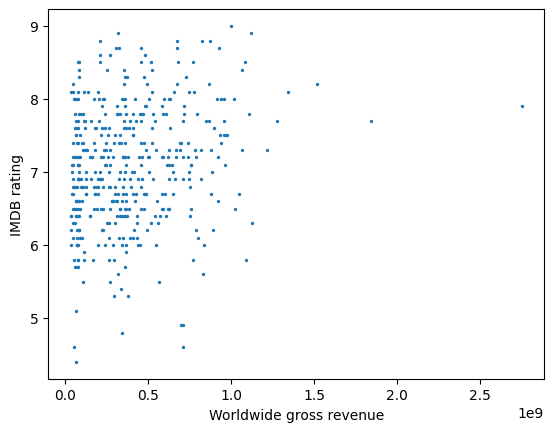

In [58]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'], s = 2)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

- Do you notice anything strange? What could be the reason?

Scatterplots are not useful when the number of datapoints is very large, as it becomes hard to interpret it. Seaborn library offers many alternative effective ways of visualizing join distributions. 

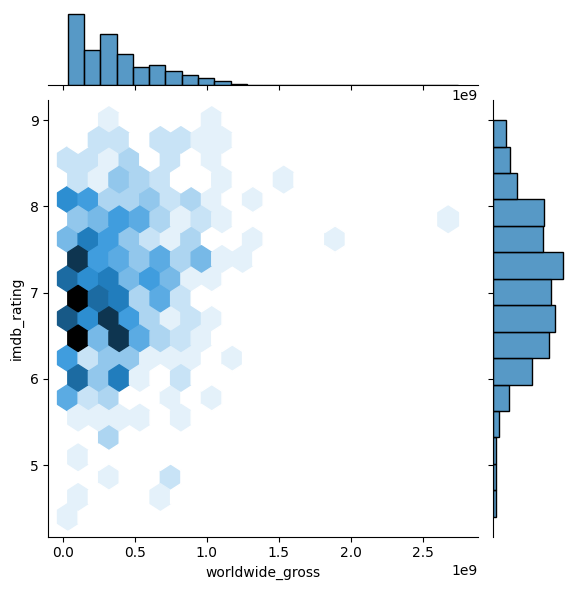

In [59]:
sns.jointplot(x=movies['worldwide_gross'], y=movies['imdb_rating'], kind="hex")

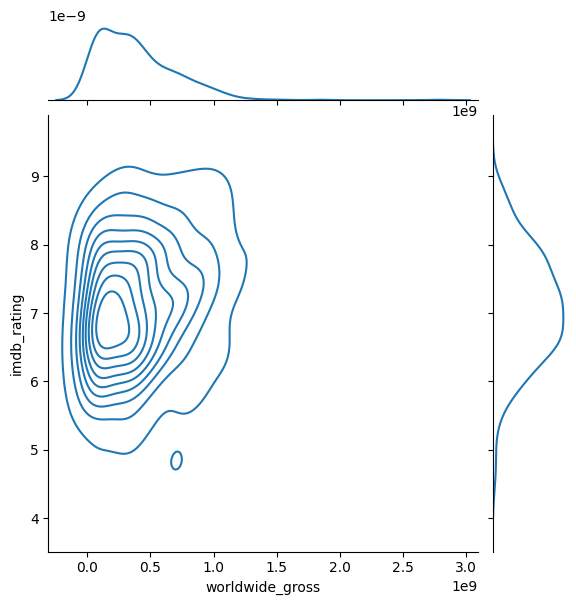

In [60]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="kde")


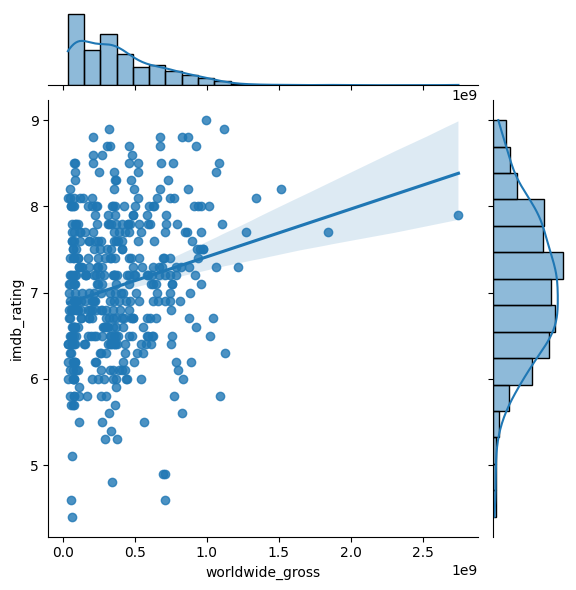

In [61]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="reg")

## Visualizing two variables, continuous and categorical

- Let's consider the five most prevalent genres, and examine the revenue.
- We'll show barplot (we get errorbars by default, how neat!), boxplot, and violinplot. Seaborn offers many more compelling visualizations. We will stop here, but see the gallery for more examples: https://seaborn.pydata.org/examples/index.html

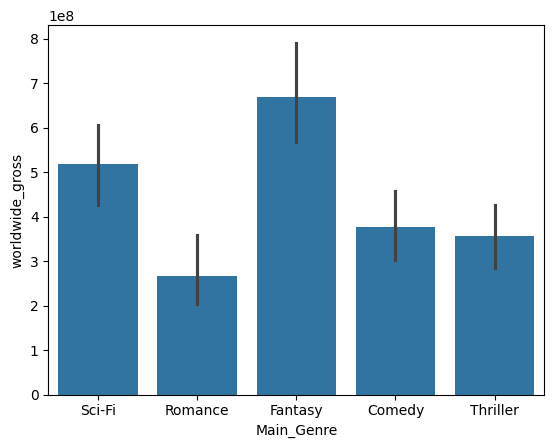

In [62]:
ax = sns.barplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

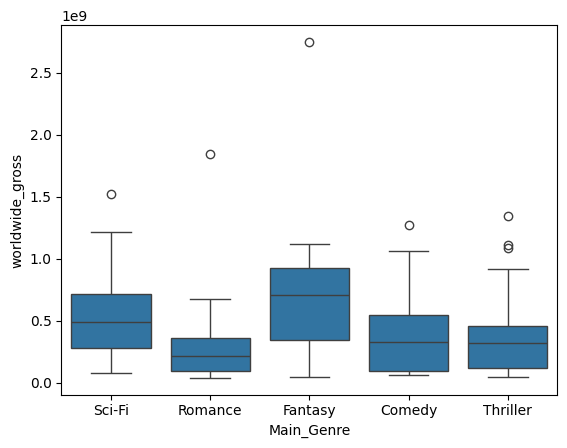

In [63]:
ax = sns.boxplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

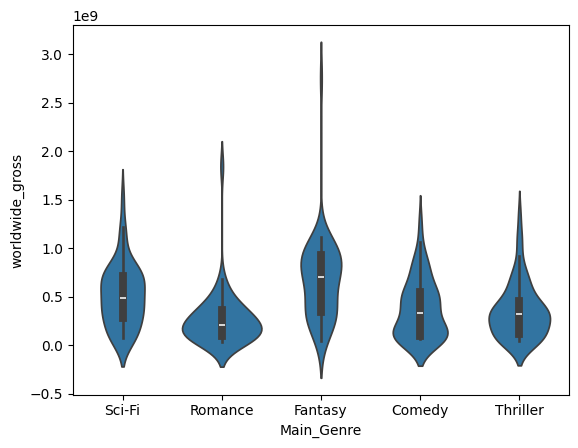

In [64]:
ax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

## B2.2 Exercises: Making more advanced visualizations


To make a good data visualization, we first need a clear idea of what we want to visualize! Do we aggregate the data, and how? What quantity should be on the different axis? How to use colors and item sizes? It often helps to sketch the visualization by hand before coding it up. By doing that, we can also give ourselves a moment to speculate what the visualization could look like under different hypotheses.

In the next three excercises, you are provided with descriptions and rough sketches of visualizations that are possibly useful to understand the movies dataset.


### 1. Visualizing uncertainty

- How did the average revenue of blockbusters evolve? Visualize the average yearly worldwide gross revenue, together with the standard deviation. Below, you are provided with two rough sketches of how the visualization could look like. We could indicate the margin of error with lines with caps, or by contouring between the upper and lower bound.

- Hints: use Matplotlib errorbar and fill_between functions.

- Did the average revenue increase/decrease over time? What do you observe?


<img src="figure0.jpg" style="width: 400px;" align="left" />
<img src="figure1.jpg" style="width: 400px;" align="left"/>


<br>


In [83]:
# Calculate yearly stats across movies here
# groupby and apply might be useful here.

# Group the data by 'year' and calculate mean and standard deviation of 'worldwide_gross'
yearly_stats = movies.groupby('year')['worldwide_gross'].agg(['mean', 'std']).reset_index()

# Rename columns
yearly_stats.rename(columns={'mean': 'average_gross', 'std': 'std_dev'}, inplace=True)

print(yearly_stats.head())

   year  average_gross       std_dev
0  1975   4.096674e+07  6.449858e+06
1  1976   6.642076e+07  2.287164e+07
2  1977   9.808576e+07  8.039820e+07
3  1978   8.944416e+07  3.714570e+07
4  1979   8.086015e+07  1.129196e+07


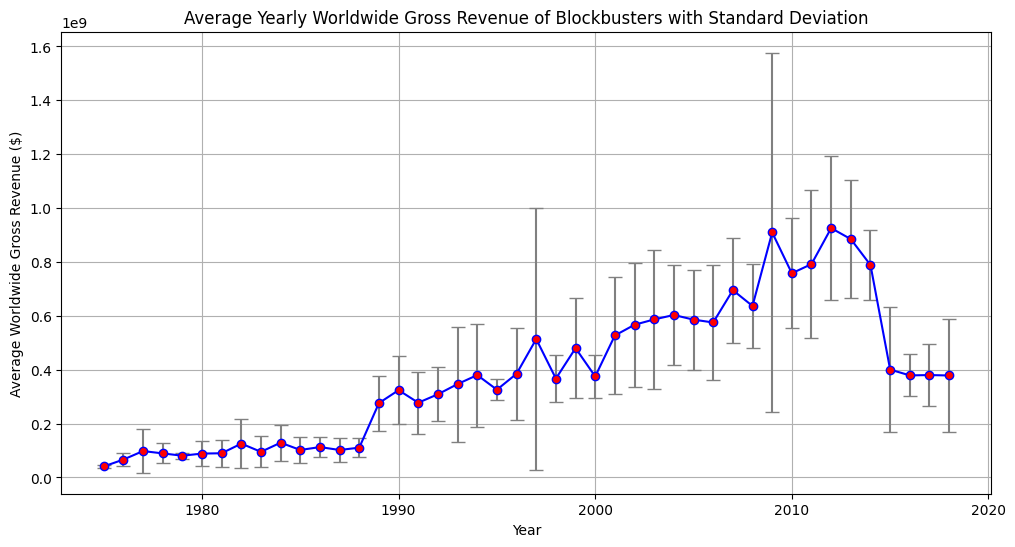

In [84]:
# Write your code to make plot with errorbars here
# use plt.errorbar

plt.figure(figsize=(12, 6))

# Plot the average gross with error bars (standard deviation)
plt.errorbar(
    x=yearly_stats['year'],
    y=yearly_stats['average_gross'],
    yerr=yearly_stats['std_dev'],
    fmt='o',                # Marker style
    ecolor='gray',          # Error bar color
    capsize=5,              # Width of the error bar caps
    linestyle='-',          # Line style connecting the markers
    color='blue',           # Marker and line color
    markerfacecolor='red'   # Marker face color
)

plt.xlabel('Year')
plt.ylabel('Average Worldwide Gross Revenue ($)')
plt.title('Average Yearly Worldwide Gross Revenue of Blockbusters with Standard Deviation')
plt.grid(True)
plt.show()


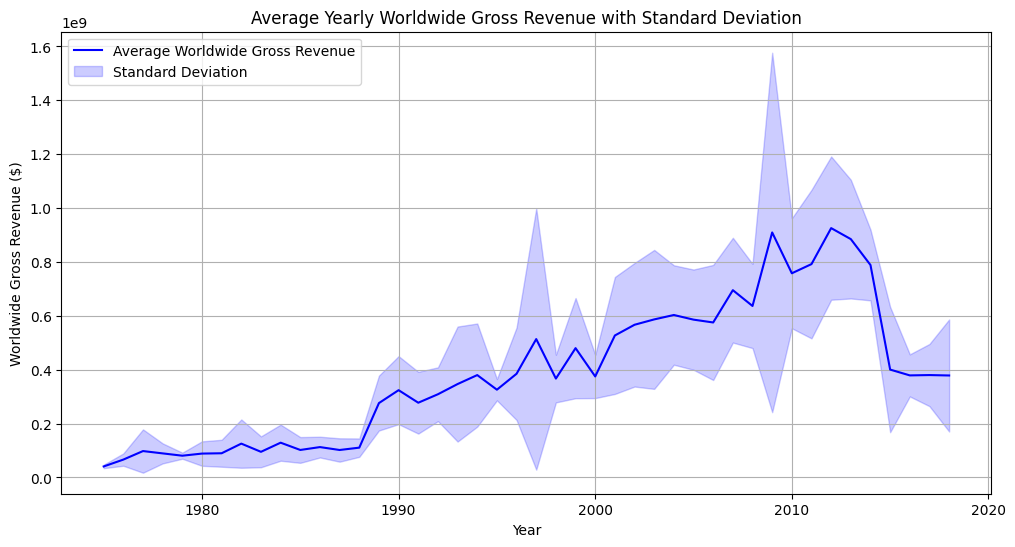

In [85]:
# Write your code to make filled plot here

plt.figure(figsize=(12, 6))

# Plot the average gross revenue
plt.plot(
    yearly_stats['year'],
    yearly_stats['average_gross'],
    color='blue',
    label='Average Worldwide Gross Revenue'
)

# Fill between (mean - std_dev) and (mean + std_dev)
plt.fill_between(
    yearly_stats['year'],
    yearly_stats['average_gross'] - yearly_stats['std_dev'],
    yearly_stats['average_gross'] + yearly_stats['std_dev'],
    color='blue',
    alpha=0.2,
    label='Standard Deviation'
)

plt.xlabel('Year')
plt.ylabel('Worldwide Gross Revenue ($)')
plt.title('Average Yearly Worldwide Gross Revenue with Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
# Write your interpretation here

### 2. Creating panels

- Next, we want to understand how long the blockbusters are in the different genres. When working with a large number of categories (we have 16 genres in the movies dataset), the visualizations easily become cluttered, and it becomes useful to make panels with small subplots.

- Make a 4x4 panel for the 16 genres. In each subplot, show a histogram with the distribution of movie lengths for different categories. Below, find a sketch of how this visualization could look like. Note the same x- and y-scale that allows comparison between categories!

- Hints: use Matplotlib subplots function to initialize the subplotting axes.

- What genres do the longest movies belong too? What can you say about the length of Comedy and animation movies?

- How could we assign different color to each subplot (each genre)? What type of palette would be the best choice? Make a variation of the visualzation where each genre is visualized in a different color.

<img src="figure3.jpg" style="width: 500px;" align="left">

In [86]:
# Calculate stats by genre here

# Group the data by 'Main_Genre' and calculate descriptive statistics for 'length'
genre_stats = movies.groupby('Main_Genre')['length'].describe()

# Display the statistics
print(genre_stats)


            count        mean        std    min     25%    50%     75%    max
Main_Genre                                                                   
Action       30.0  130.566667  14.421448  103.0  118.25  133.0  140.75  156.0
Adventure    13.0  127.153846  17.140819   97.0  121.00  126.0  139.00  163.0
Animation    22.0   98.227273   9.395702   82.0   91.00   96.5  106.00  118.0
Comedy       55.0   99.400000   9.891261   81.0   92.50   99.0  107.00  119.0
Crime        17.0  115.235294  17.192038   85.0  100.00  114.0  128.00  147.0
Drama        30.0  122.900000  27.673403   80.0  103.50  125.0  141.00  187.0
Family       16.0  111.125000  18.675742   88.0   98.00  103.0  125.25  150.0
Fantasy      54.0  128.907407  27.921905   83.0  104.00  132.0  145.50  201.0
History       5.0  129.600000  62.275999   27.0  132.00  140.0  154.00  195.0
Horror        8.0  119.875000  11.076842  106.0  112.50  117.5  128.75  135.0
Music         9.0  116.888889  17.765447   91.0  100.00  124.0  

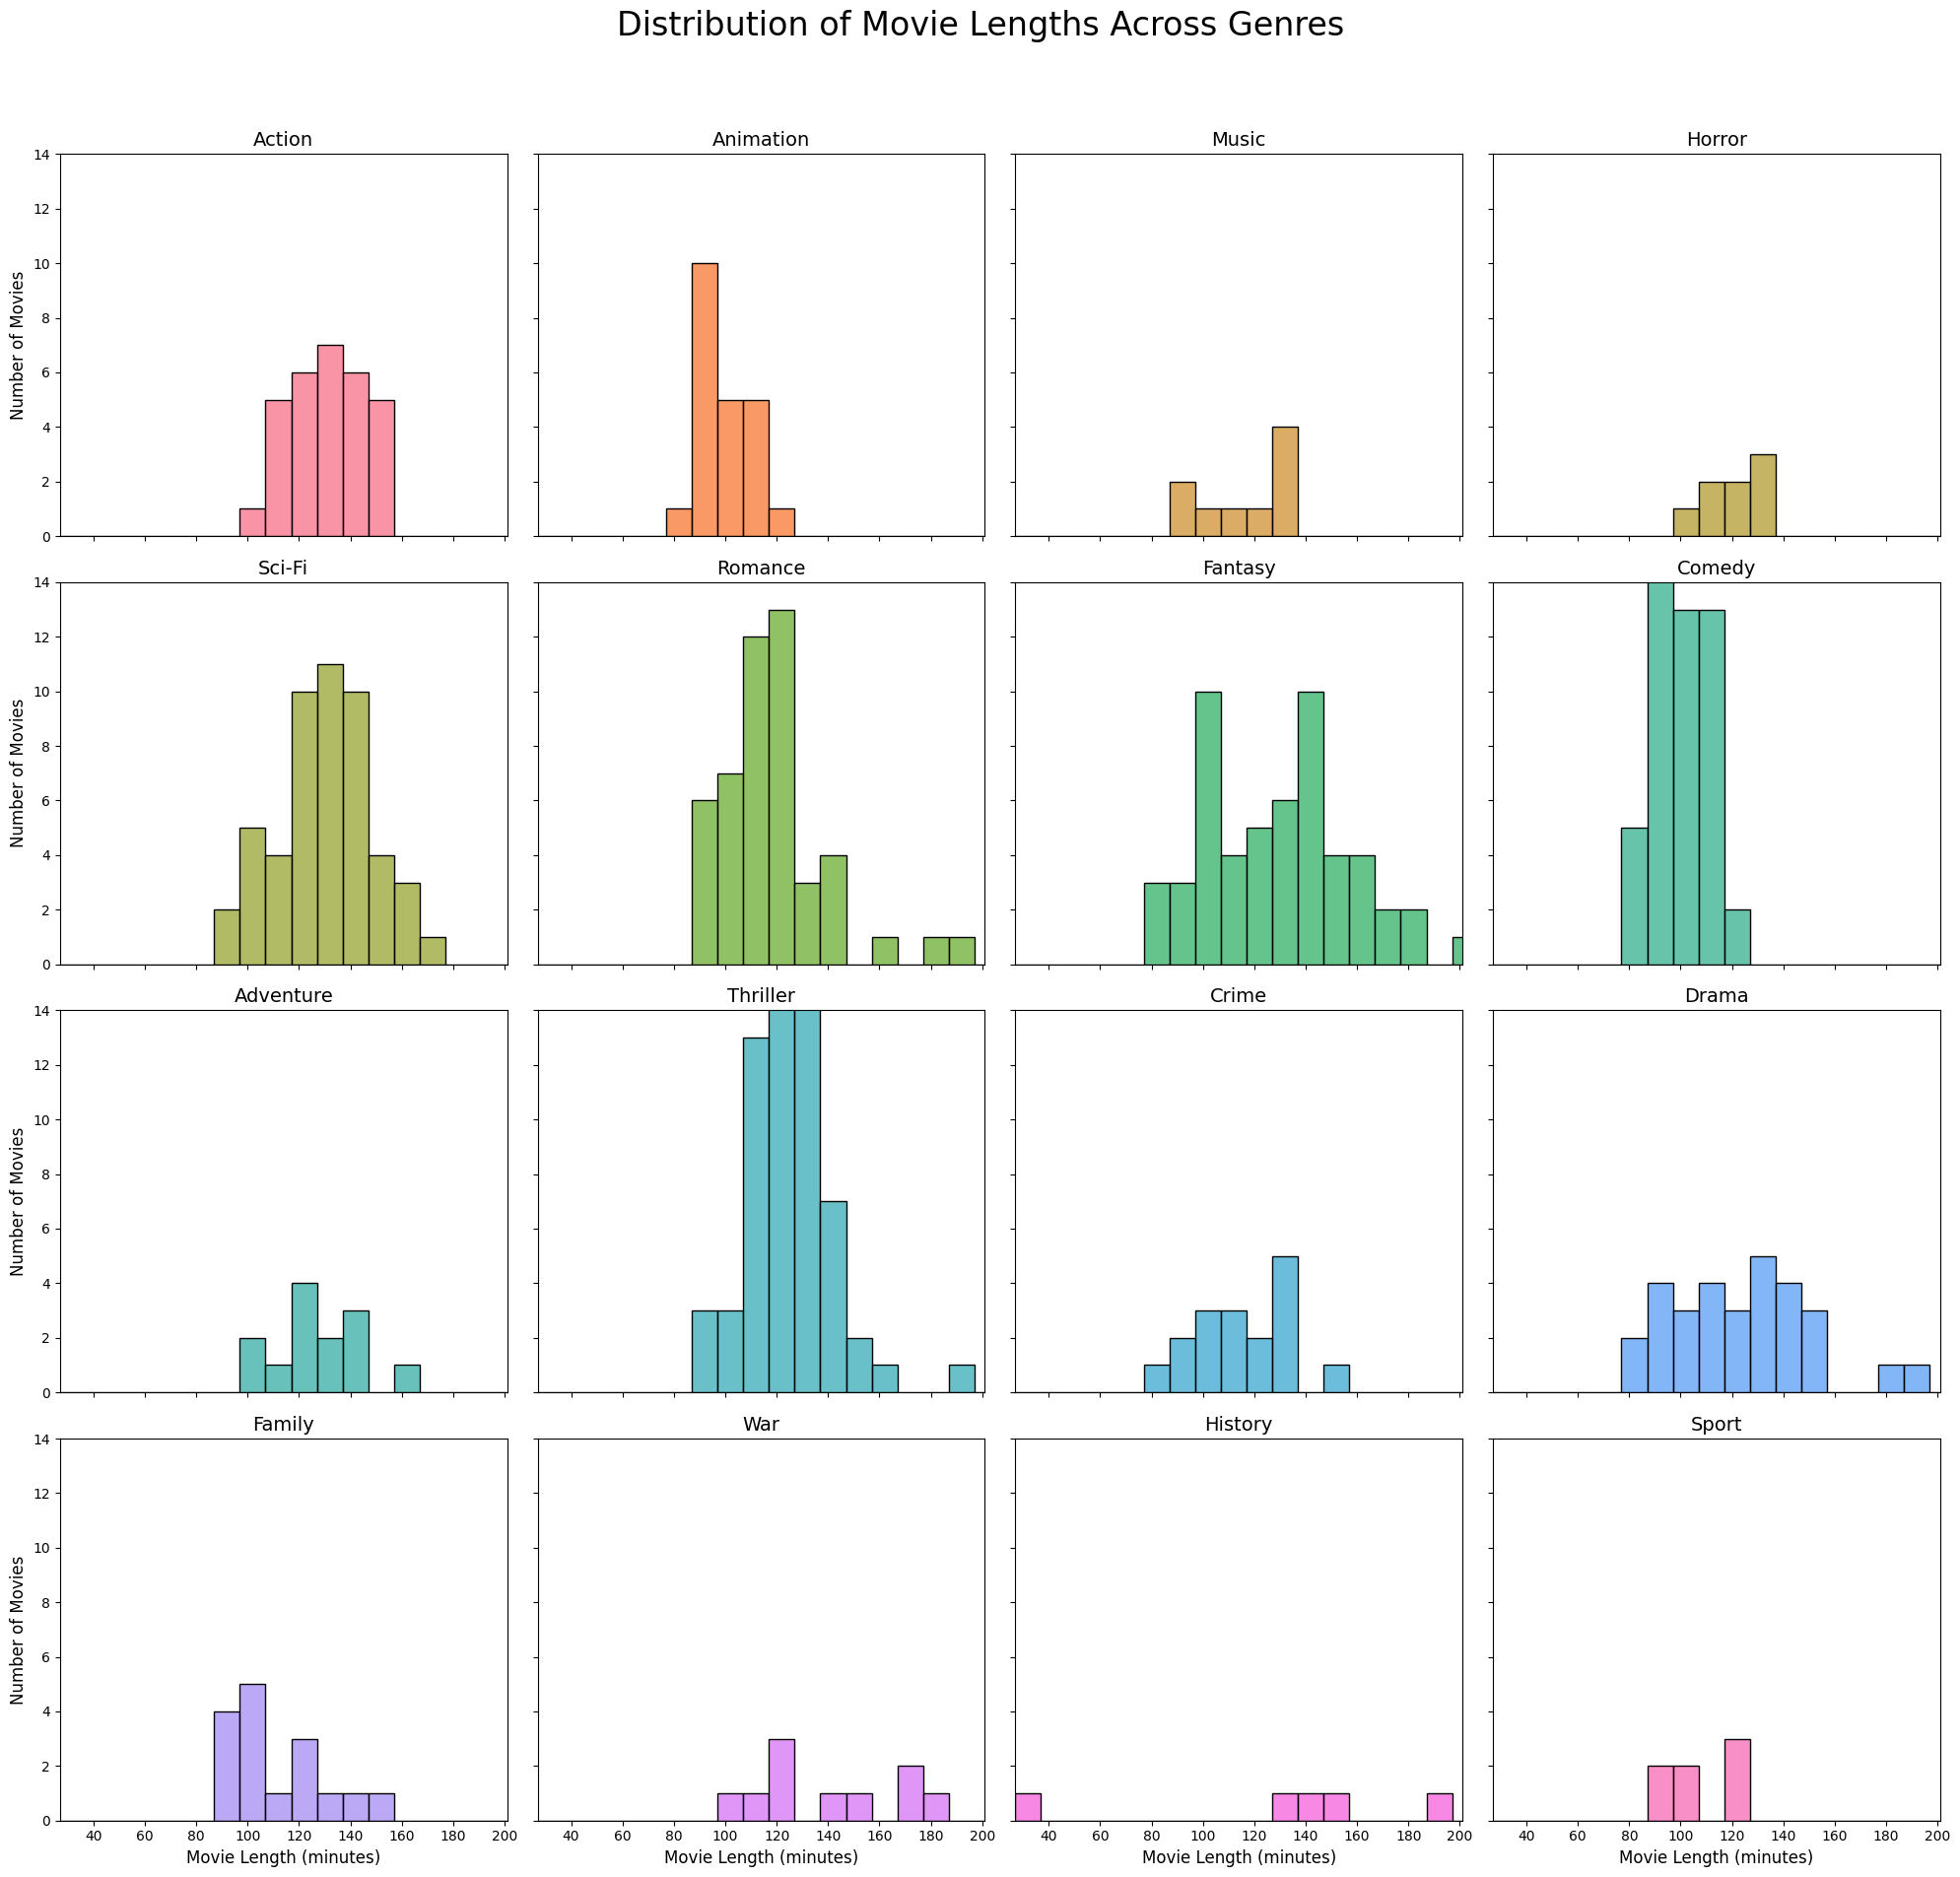

In [ ]:
# Write your code to make 4x4 panel here

rows, cols = 4, 4

# Initialize the subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(20, 20), sharex=True, sharey=True)

axes = axes.flatten()

# Retrieve the list of genres
genres = movies['Main_Genre'].unique()

# Define a color palette with 16 distinct colors
palette = sns.color_palette("husl", len(genres))  # 'husl' provides distinct colors

# Define global bin edges
bin_size = 10
min_length = movies['length'].min()
max_length = movies['length'].max()
bins = range(int(min_length), int(max_length) + bin_size, bin_size)

# Iterate over each genre and plot its histogram
for idx, genre in enumerate(genres):
    ax = axes[idx]
    genre_data = movies[movies['Main_Genre'] == genre]['length']
    sns.histplot(genre_data, bins=bins, kde=False, color=palette[idx], ax=ax)
    ax.set_title(genre, fontsize=14)
    ax.set_xlim(min_length, max_length)
    ax.set_ylim(0, movies['length'].value_counts().max())
    ax.set_xlabel('Movie Length (minutes)', fontsize=12)
    ax.set_ylabel('Number of Movies', fontsize=12)

# Remove any unused subplots if genres < 16
for idx in range(len(genres), rows * cols):
    fig.delaxes(axes[idx])

# Add overall labels and title
plt.suptitle('Distribution of Movie Lengths Across Genres', fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()


In [71]:
# Write your interpretation here

### 3. Heatmaps

- What studios make blockbusters in which genre? 

- There are many studios and many genres. When working with two variables that both have many different categories, there is often no space for representing each combination of two categories with a detailed plot (such as barplot of boxplot). It becomes useful to represent each stratum with one number, indicated with color in a heatmap. Such visualizations are useful to quickly understand the data.

- Visualize the number of blockbusters made by each studio, of each genre. You will find below a rough sketch. Hint: use Seaborn heatmap function. 

- Finally, with a heatmap we can represent three variables, by coding a third variable with color. Try to understand what is the relationship between genres by understanding the co-occurence patterns between the main and secondary genre. What is the average worldwide gross revenue for movies with different combinations of main and second genre?

- You should be able to easily answer the following questions from the two visualizations: What genres do the majority of movies made by Warner Bros studio fall into? What is the most successful genre of Walt Disney pictures movies? What studio made the largest number of Romance blockbusters? Which combination of genres brings the highest revenue?



<img src="figure4.jpg" style="width: 500px;" align="left">

Main_Genre         Action  Adventure  Animation  Comedy  Crime  Drama  Family  \
studio                                                                          
20th Century Fox        2          1          2      10      2      2       3   
Columbia Pictures       1          3          0       2      2      3       2   
DreamWorks              0          0          0       5      0      1       0   
Embassy Pictures        0          0          0       0      0      0       0   
IFC Films               0          0          0       0      0      0       0   

Main_Genre         Fantasy  History  Horror  Music  Romance  Sci-Fi  Sport  \
studio                                                                       
20th Century Fox         6        0       0      1        1      12      0   
Columbia Pictures        5        0       1      1        6       5      0   
DreamWorks               0        0       0      0        1       3      0   
Embassy Pictures         1        0       

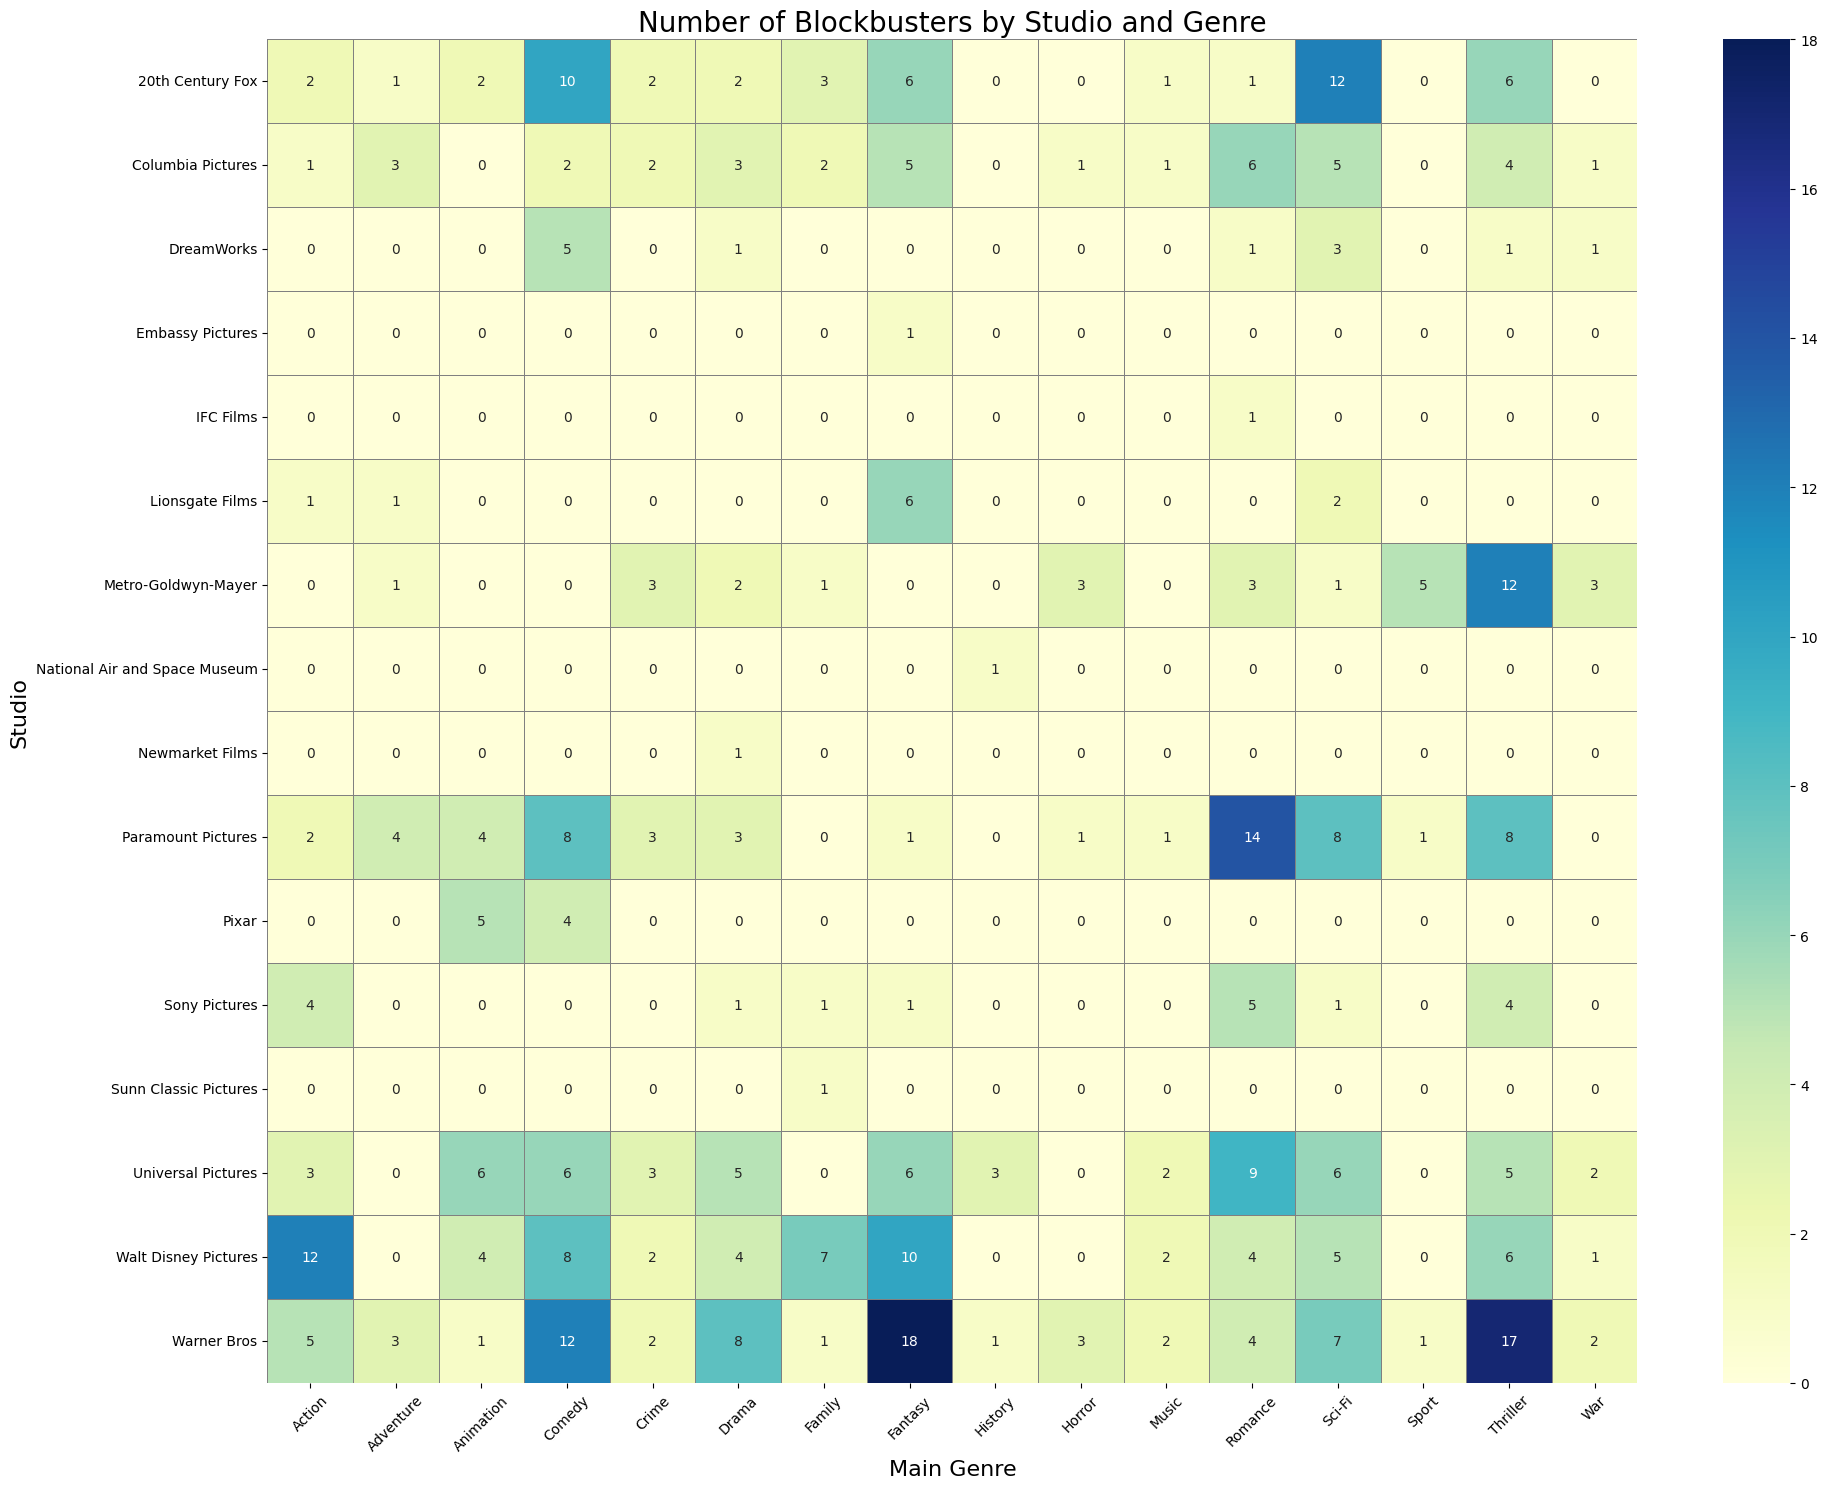

In [93]:
# Write your code to make the first heatmap here
# crosstab might be useful here

# Create a crosstab of Studio vs Main_Genre
studio_genre_counts = pd.crosstab(movies['studio'], movies['Main_Genre'])

# Display the crosstab
print(studio_genre_counts.head())

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(
    studio_genre_counts,
    annot=True,                  # Annotate cells with counts
    fmt='d',                     # Integer format
    cmap='YlGnBu',               # Color palette
    linewidths=.5,               # Lines between cells
    linecolor='gray'
)
plt.title('Number of Blockbusters by Studio and Genre', fontsize=20)
plt.xlabel('Main Genre', fontsize=16)
plt.ylabel('Studio', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Genre_2          Action     Adventure     Animation        Comedy  Crime  \
Main_Genre                                                                 
Action              0.0  4.068119e+08  0.000000e+00  2.994036e+08    0.0   
Adventure   554892407.3  0.000000e+00  0.000000e+00  1.748035e+08    0.0   
Animation   474924996.0  6.800678e+08  4.553378e+08  5.103460e+08    0.0   
Comedy      108164777.2  2.659082e+08  6.562677e+08  0.000000e+00    0.0   
Crime               0.0  3.514032e+08  0.000000e+00  1.473844e+08    0.0   

Genre_2     Documentary  Drama       Family  Fantasy  History  Horror  \
Main_Genre                                                              
Action                0    0.0          0.0      0.0        0       0   
Adventure             0    0.0          0.0      0.0        0       0   
Animation             0    0.0  421378636.0      0.0        0       0   
Comedy                0    0.0          0.0      0.0        0       0   
Crime                 0    0.

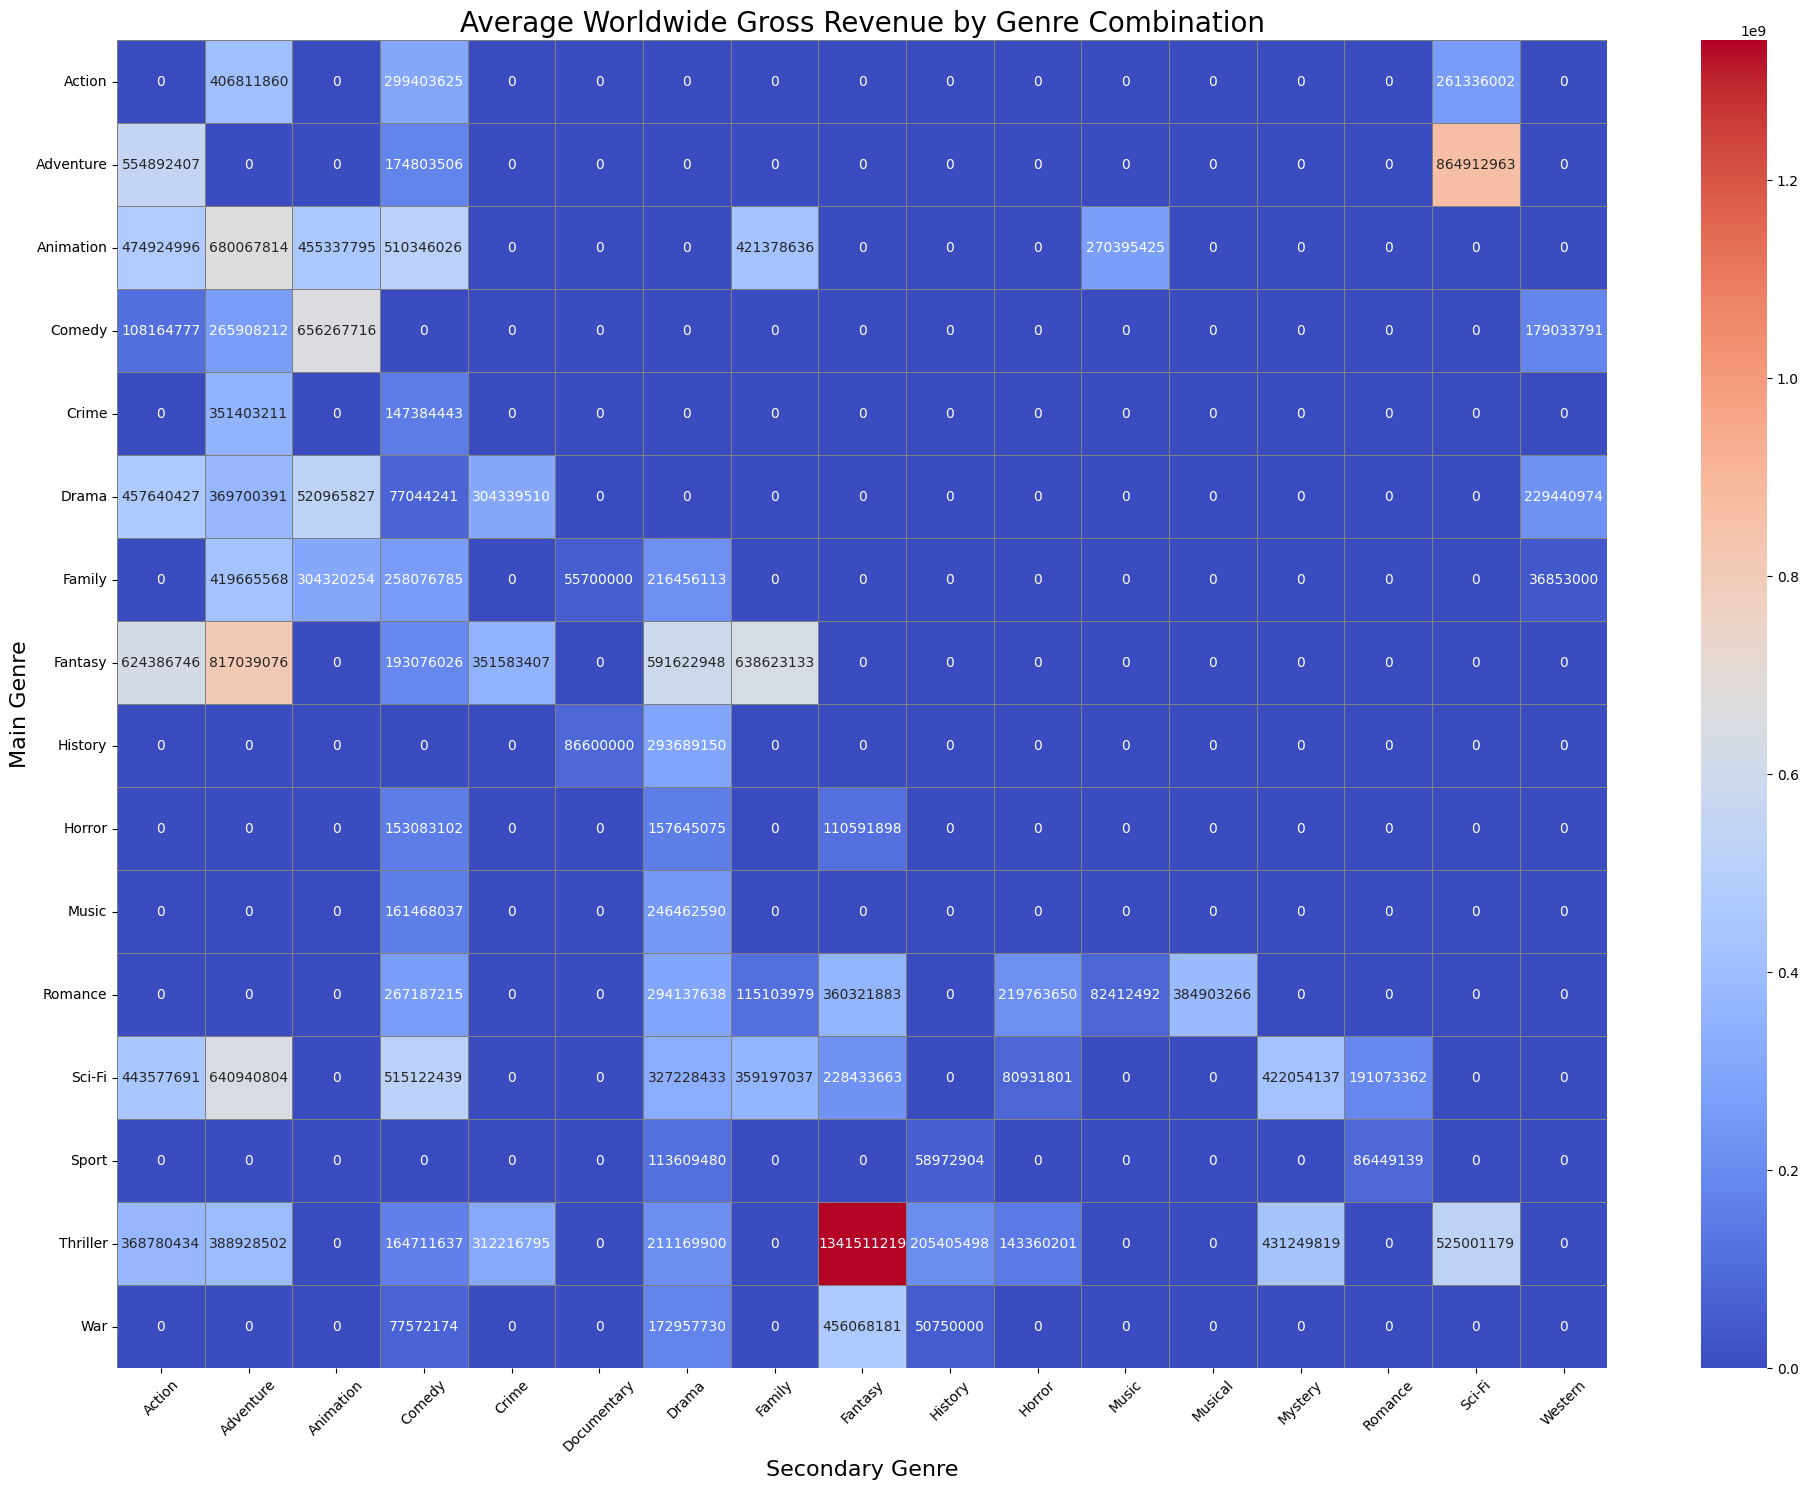

In [94]:
# Write your code to make the second heatmap here

# Create a pivot table with Main_Genre and Genre_2, calculating the average worldwide gross
genre_combo_revenue = movies.pivot_table(
    index='Main_Genre',
    columns='Genre_2',
    values='worldwide_gross',
    aggfunc='mean',
    fill_value=0  # Replace NaN with 0
)

# Display the pivot table
print(genre_combo_revenue.head())

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(
    genre_combo_revenue,
    annot=True,                  # Annotate cells with average revenue
    fmt='.0f',                   # Integer format without decimal
    cmap='coolwarm',             # Diverging colormap
    linewidths=.5,
    linecolor='gray'
)
plt.title('Average Worldwide Gross Revenue by Genre Combination', fontsize=20)
plt.xlabel('Secondary Genre', fontsize=16)
plt.ylabel('Main Genre', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [74]:
# Write your interpretations here

### 4. Be a show-off

Finally, we did not explore the impact of the rank of the movie among the top ten. How is the rank among the top ten related to the genres? What kind of visualization can be suitable to understand this better? To practice your data viz skills, sketch a potential visualization on a piece of paper, and then implement it using the appropriate type of visualization.

Descriptive Statistics by Genre:
             count      mean       std  min   25%  50%    75%   max
Main_Genre                                                        
Action       30.0  5.100000  2.758685  1.0  3.00  5.0   7.00  10.0
Adventure    13.0  3.615385  2.754949  1.0  2.00  3.0   5.00   9.0
Animation    22.0  5.909091  2.706414  2.0  3.25  6.0   8.75  10.0
Comedy       55.0  5.945455  2.717694  1.0  4.00  6.0   8.00  10.0
Crime        17.0  7.058824  2.726504  2.0  6.00  8.0   9.00  10.0
Drama        30.0  5.233333  3.202190  1.0  2.00  5.0   8.75  10.0
Family       16.0  5.937500  2.999305  1.0  3.75  6.0   8.25  10.0
Fantasy      54.0  4.370370  2.830403  1.0  2.00  4.0   6.00  10.0
History       5.0  5.000000  3.162278  2.0  3.00  4.0   6.00  10.0
Horror        8.0  6.750000  2.549510  2.0  6.25  7.5   8.00  10.0
Music         9.0  7.222222  3.192874  2.0  7.00  8.0  10.00  10.0
Romance      48.0  5.583333  2.827173  1.0  3.00  5.5   8.00  10.0
Sci-Fi       50.0  5.600000 

C:\Users\Pavel Detvan\AppData\Local\Temp\ipykernel_5968\1311902465.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


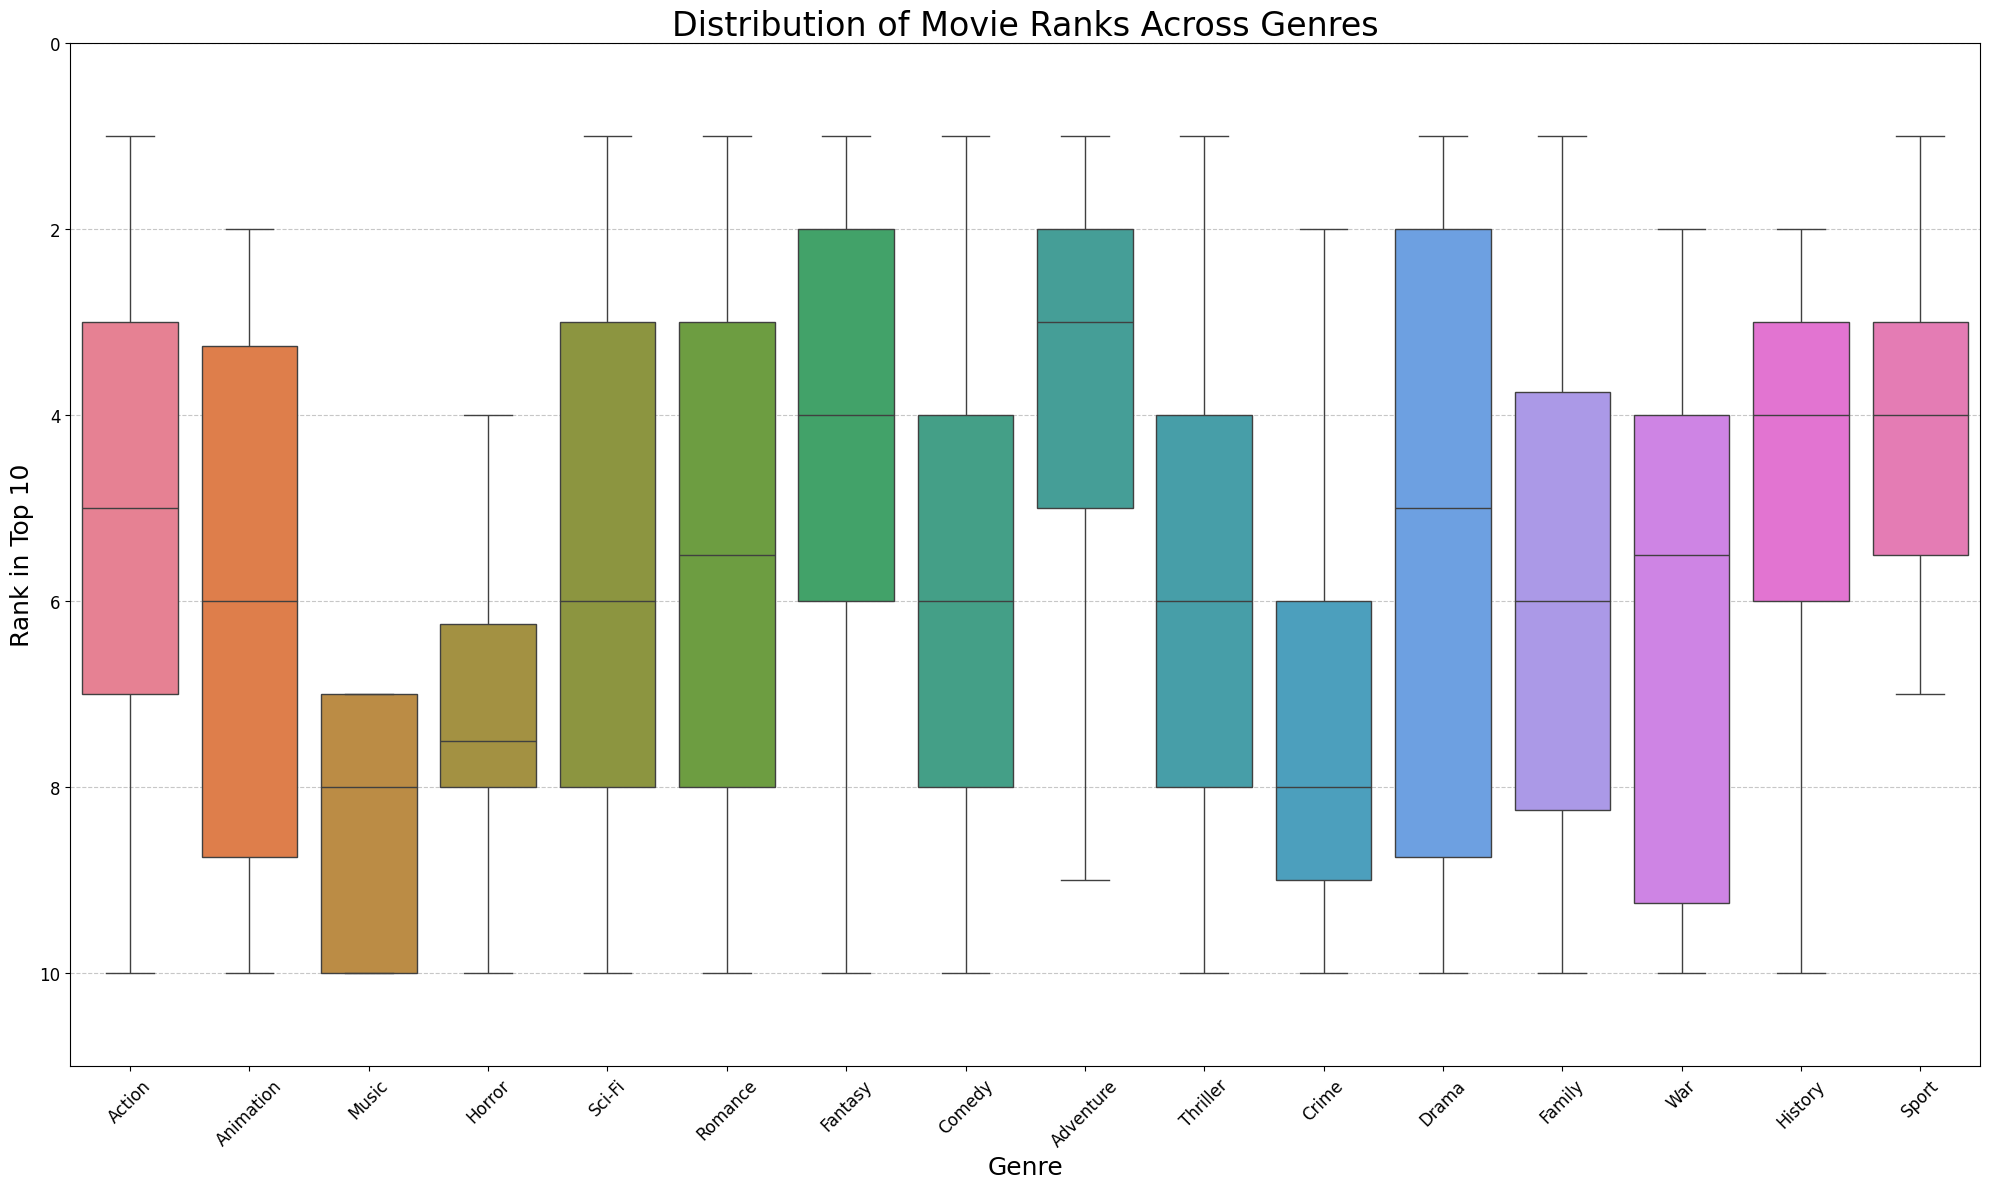

In [95]:
# Write your dataviz show-off code here

# Calculate Summary Statistics by Genre
genre_rank_stats = movies.groupby('Main_Genre')['rank_in_year'].describe()
print("Descriptive Statistics by Genre:\n", genre_rank_stats)

# Prepare Data for Visualization
unique_genres = movies['Main_Genre'].unique()

# Define a color palette
palette = sns.color_palette("husl", len(unique_genres))  # 'husl' provides distinct colors

# Create the Box Plot
plt.figure(figsize=(20, 12))

# Create a box plot using Seaborn
sns.boxplot(
    x='Main_Genre',
    y='rank_in_year',
    data=movies,
    palette=palette,
    showfliers=False  # Exclude outliers
)

plt.title('Distribution of Movie Ranks Across Genres', fontsize=24)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Rank in Top 10', fontsize=18)
plt.ylim(0, 11)  # Since ranks are from 1 to 10
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis so that rank 1 is at the top
plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

C:\Users\Pavel Detvan\AppData\Local\Temp\ipykernel_5968\3823115404.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


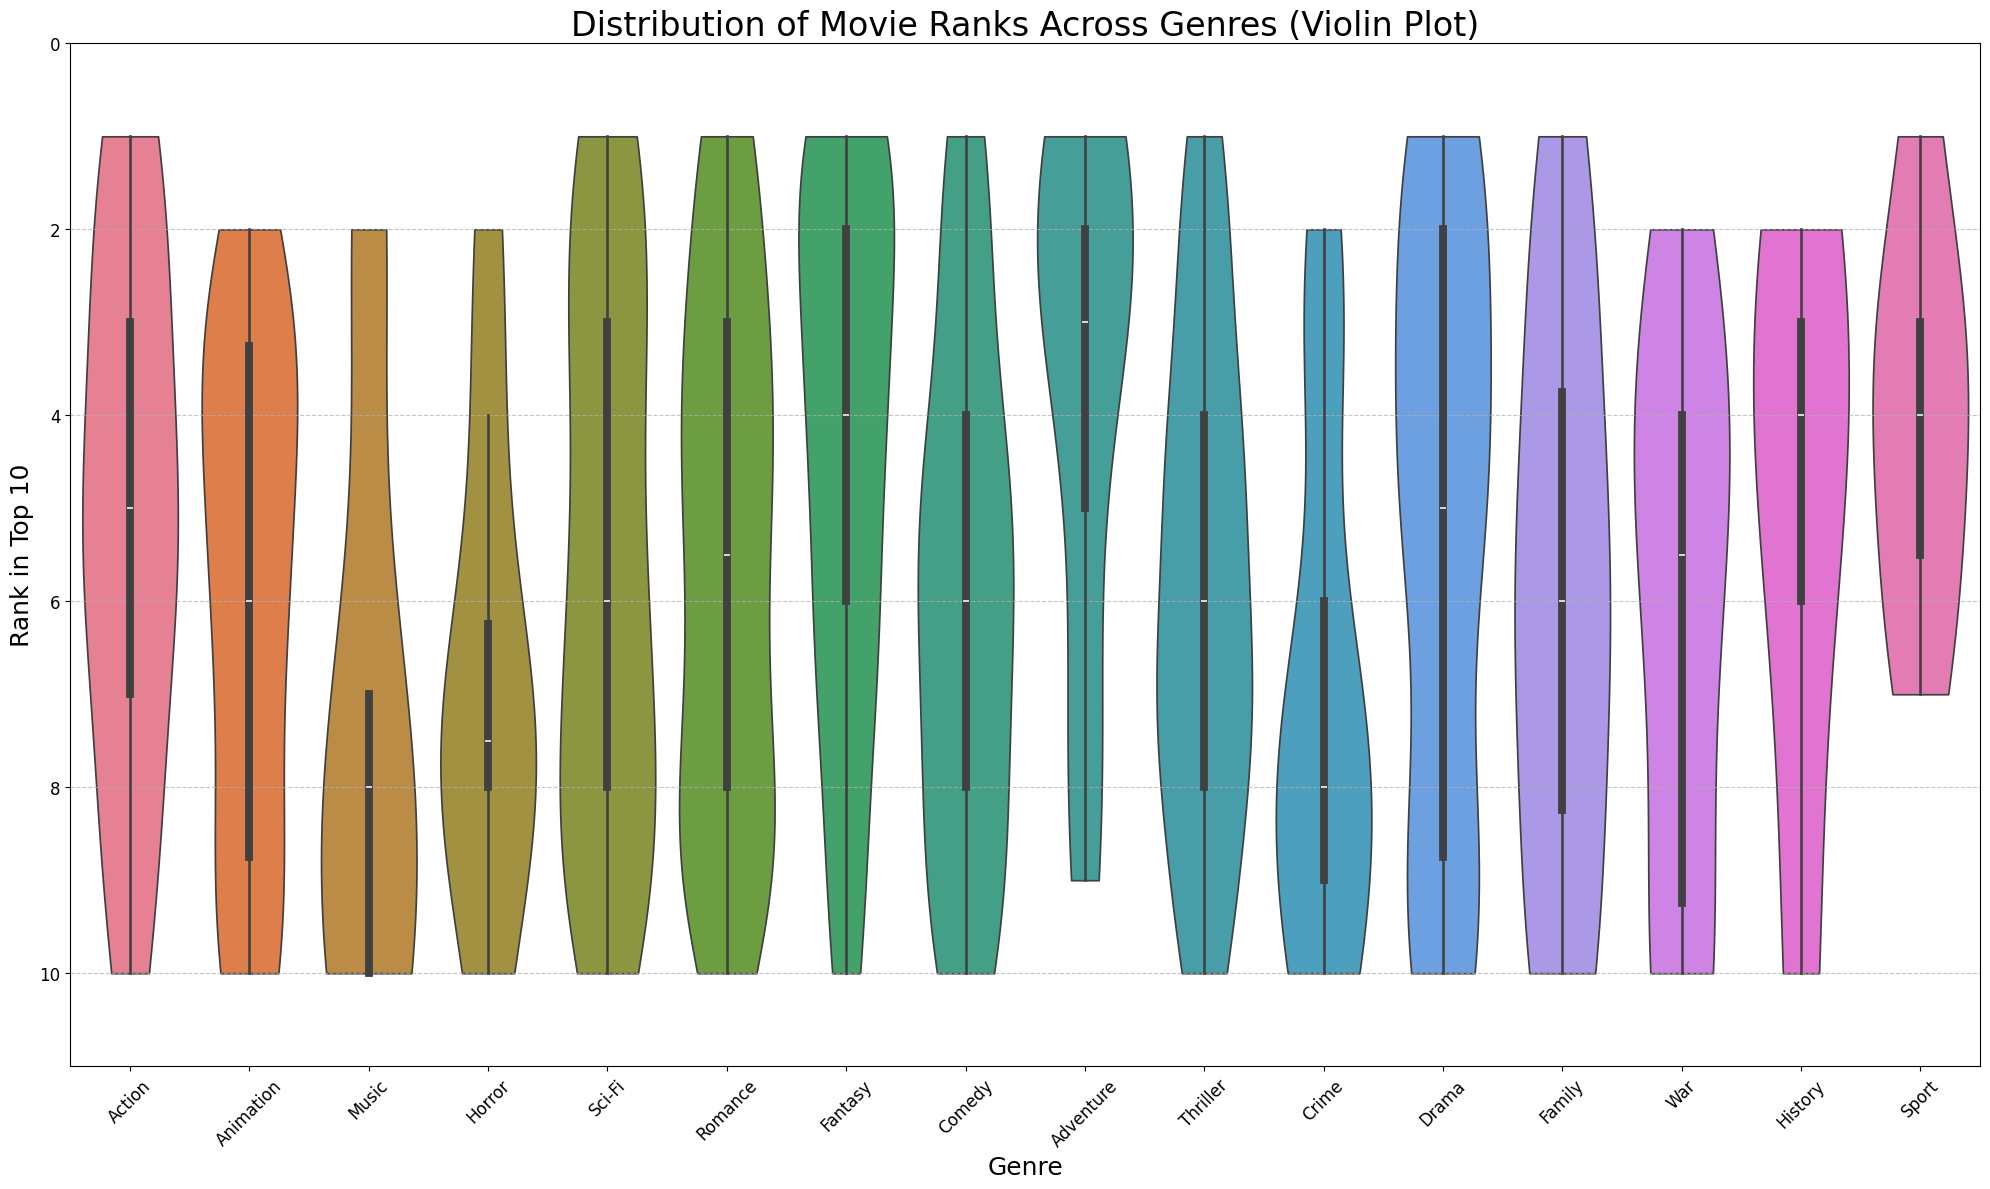

In [96]:
# Step 4: Create a Violin Plot
plt.figure(figsize=(20, 12))

# Create a violin plot using Seaborn
sns.violinplot(
    x='Main_Genre',
    y='rank_in_year',
    data=movies,
    palette=palette,
    inner='box',  # Adds a box plot inside the violin
    cut=0          # Limits the violin to the data range
)

# Enhance Plot Aesthetics
plt.title('Distribution of Movie Ranks Across Genres (Violin Plot)', fontsize=24)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Rank in Top 10', fontsize=18)
plt.ylim(0, 11)  # Since ranks are from 1 to 10
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis so that rank 1 is at the top
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
